### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
hp_df = pd.read_csv('Holiday_Package.csv').drop('Unnamed: 0',axis=1) #drop the unnamed column

In [3]:
hp_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
# clean up
    # duplicate, null values, outliers, ?, # .
    # categorical to numeric

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [11]:
#check the datatypes
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [27]:
#Check for the description
hp_df.describe(include = 'all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.0,872.0,872
unique,2,NaN,NaN,NaN,4.0,7.0,2
top,no,NaN,NaN,NaN,0.0,0.0,no
freq,471,NaN,NaN,NaN,665.0,393.0,656
mean,NaN,47729.172018,39.955275,9.307339,NaN,NaN,NaN
std,NaN,23418.668531,10.551675,3.036259,NaN,NaN,NaN
min,NaN,1322.000000,20.000000,1.000000,NaN,NaN,NaN
25%,NaN,35324.000000,32.000000,8.000000,NaN,NaN,NaN
50%,NaN,41903.500000,39.000000,9.000000,NaN,NaN,NaN
75%,NaN,53469.500000,48.000000,12.000000,NaN,NaN,NaN


In [16]:
#Check for datatypes**
hp_df.dtypes.value_counts()

int64     5
object    2
dtype: int64

In [4]:
hp_df['no_young_children'] = hp_df['no_young_children'].astype('object')
hp_df['no_older_children'] = hp_df['no_older_children'].astype('object')

In [26]:
#Check for datatypes**
hp_df.dtypes.value_counts()

object    4
int64     3
dtype: int64

In [4]:
#check the shape of the dataset
print('The no. of rows and the no. of columns of the dataset are {} and {} respectively '.format(hp_df.shape[0],hp_df.shape[1]))

The no. of rows and the no. of columns of the dataset are 872 and 7 respectively 


In [12]:
#check for the null values
hp_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [13]:
#check for the duplicates
hp_df.duplicated().sum()

0

In [14]:
print('The no. of duplicated records in the dataset is {} '.format(hp_df.duplicated().sum()))

The no. of duplicated records in the dataset is 0 


####  Check for EDA

In [28]:
cat = hp_df.dtypes[hp_df.dtypes=='object'].index
num = hp_df.dtypes[hp_df.dtypes!='object'].index

In [29]:
for i in cat:
    print (i)
    print(hp_df[i].value_counts(normalize = True).round(2)*100)
    print("--------------------")

Holliday_Package
no     54.0
yes    46.0
Name: Holliday_Package, dtype: float64
--------------------
no_young_children
0    76.0
1    17.0
2     6.0
3     1.0
Name: no_young_children, dtype: float64
--------------------
no_older_children
0    45.0
2    24.0
1    23.0
3     6.0
4     2.0
5     0.0
6     0.0
Name: no_older_children, dtype: float64
--------------------
foreign
no     75.0
yes    25.0
Name: foreign, dtype: float64
--------------------


In [6]:
#value counts for each category- no of young children
hp_df['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [8]:
#value counts for each category- no of older children
hp_df['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [54]:
hp_df['educ'].value_counts().sort_index().to_frame()

,educ
1,1
2,6
3,11
4,50
5,67
6,21
7,31
8,157
9,114
10,90


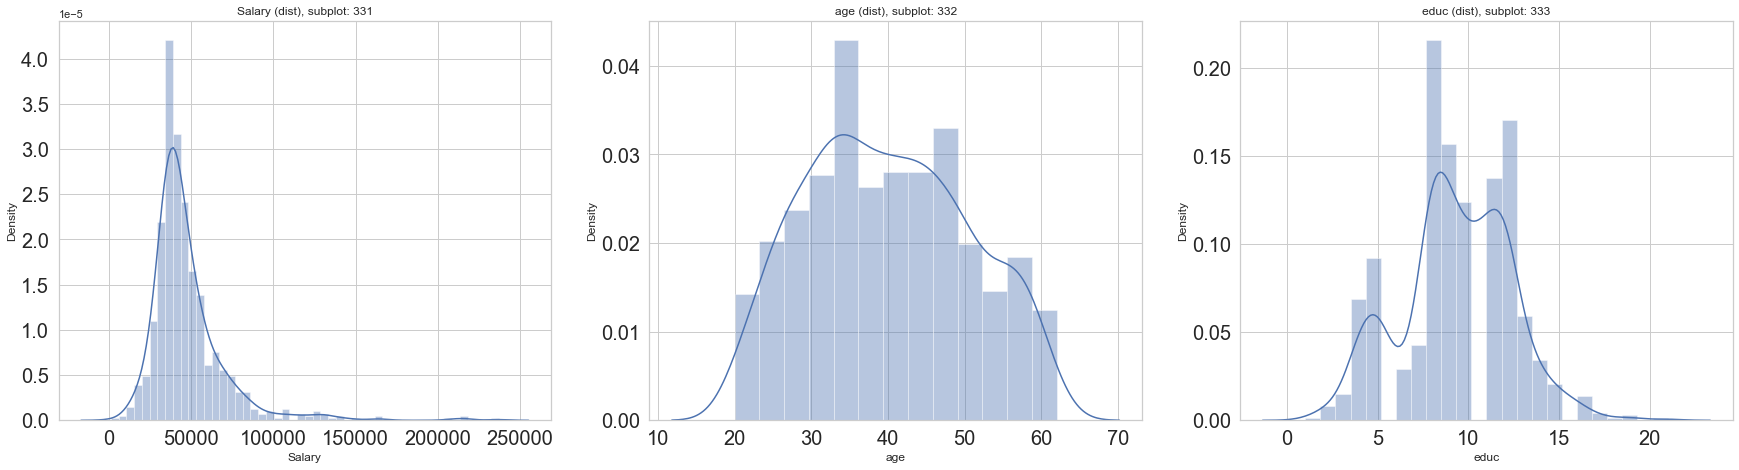

In [41]:
#Check for Distribution plots(histogram)  
fig = plt.figure(figsize=(30,25))
c = 1
for i in num:
    plt.subplot(3, 3, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    sns.distplot(hp_df[i])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    c = c + 1

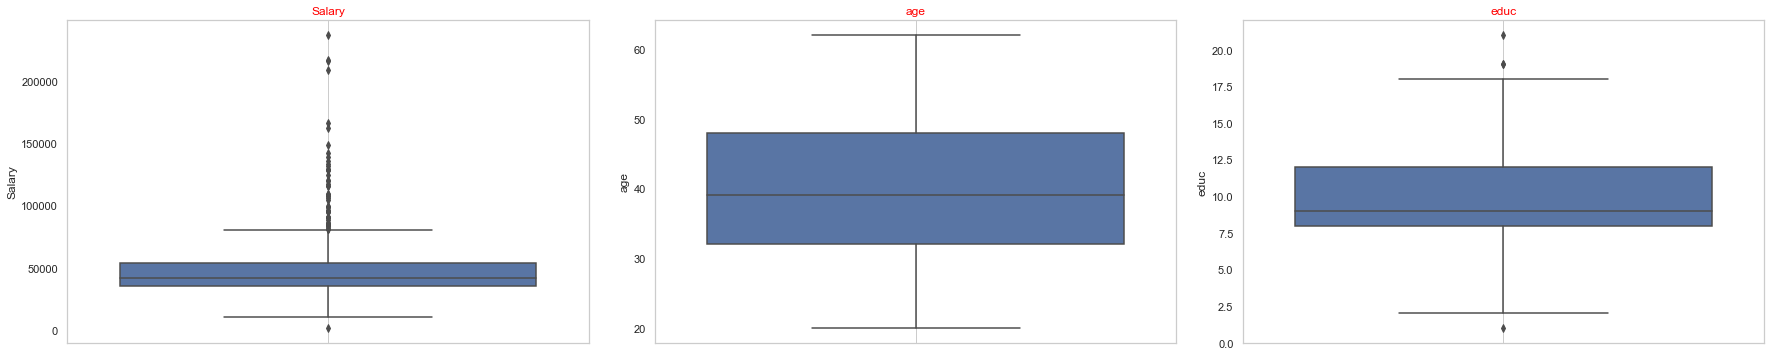

In [45]:
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=hp_df[num]
fig=plt.figure(figsize=(25,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

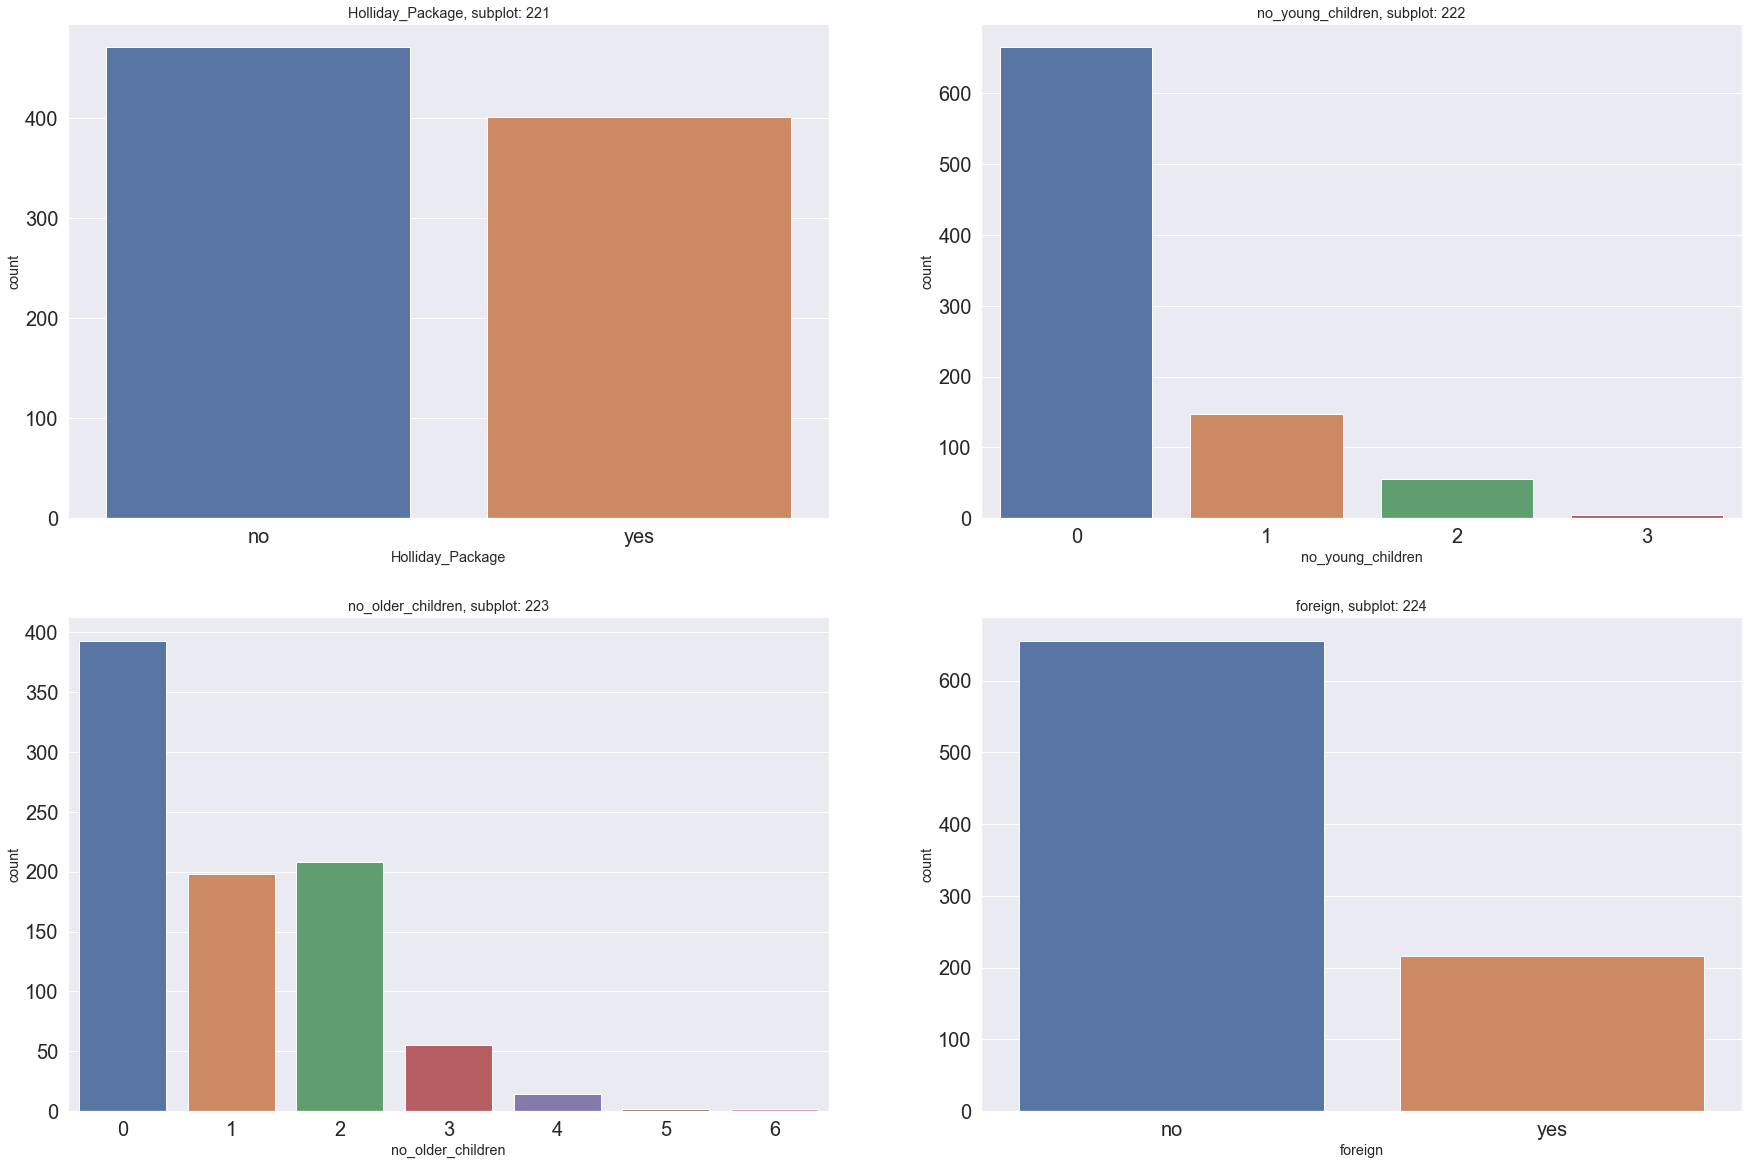

In [57]:
#Check for Count plots(barplots)  
fig = plt.figure(figsize=(30,20))
c = 1
for i in cat:
    plt.subplot(2, 2, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 2, 2, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.countplot(hp_df[i])
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

<AxesSubplot:title={'center':'Years of Education'}, xlabel='educ', ylabel='count'>

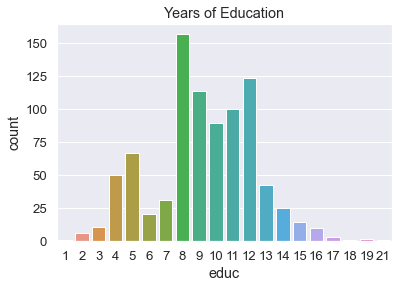

In [56]:
plt.title('Years of Education')
sns.countplot(hp_df['educ'])

<AxesSubplot:>

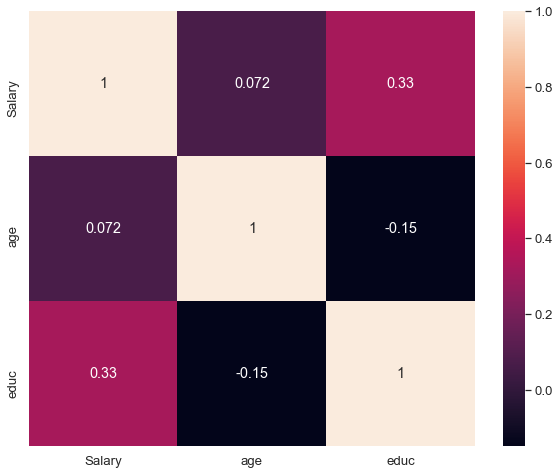

In [48]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(hp_df[num].corr(),annot = True)

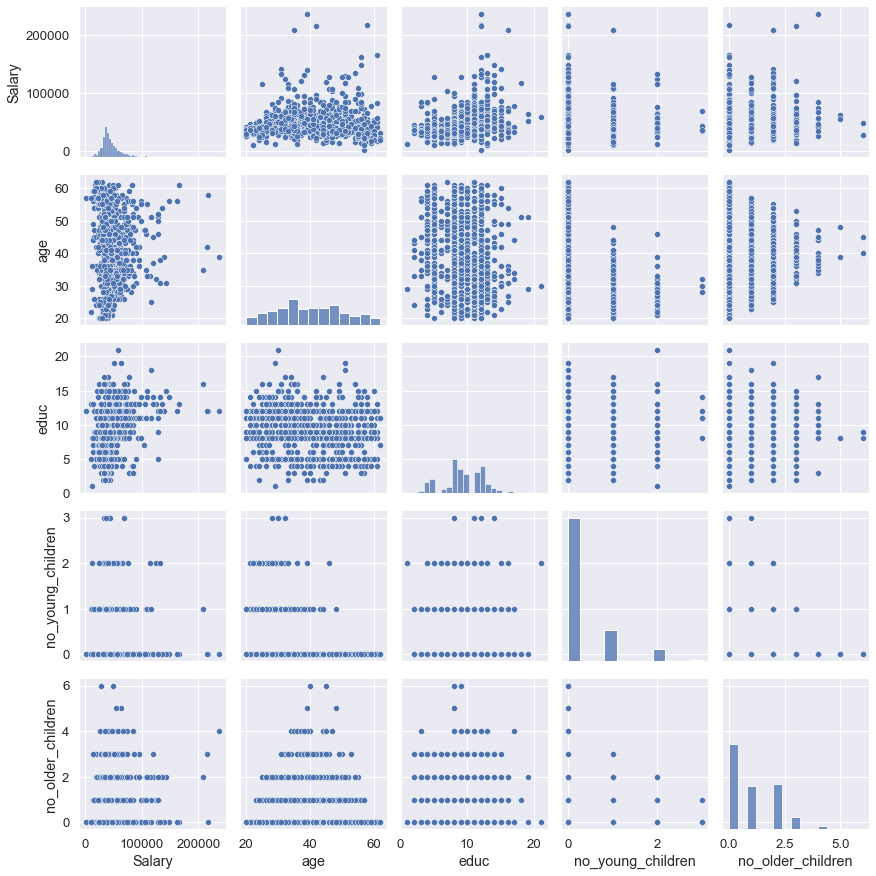

In [58]:
# Check with the pairplots for bi variate data
sns.pairplot(hp_df,diag_kind='hist')
plt.show()

**2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).**

In [5]:
#**Convert Object datatypes to categorical** using encoding
for i in hp_df.columns:
    if hp_df[i].dtype == 'object':
        hp_df[i]= pd.Categorical(hp_df[i]).codes

In [6]:
hp_df.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [62]:
hp_df.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [63]:
hp_df.foreign.value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [75]:
hp_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [76]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int8 
 5   no_older_children  872 non-null    int8 
 6   foreign            872 non-null    int8 
dtypes: int64(3), int8(4)
memory usage: 24.0 KB


# Model building

In [7]:
# Copy all the predictor variables into X dataframe. Since 'Holliday_Package' is dependent variable drop it
x = hp_df.drop('Holliday_Package', axis=1)
# Copy the 'Holliday_Package' column alone into the y dataframe. This is the dependent variable
y = hp_df[['Holliday_Package']]

In [77]:
print('The shape of X and Y are {} and {} respectively '.format(x.shape,y.shape))

The shape of X and Y are (872, 6) and (872, 1) respectively 


# train test split

In [8]:
# Split X and Y into training and test set in 70:30 ratio
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((610, 6), (262, 6), (610, 1), (262, 1))

In [70]:
print('The shape of the training records in the dataset i.e., X_train and Y_train are {} and {} '.format(xtrain.shape,ytrain.shape))

The shape of the training records in the dataset i.e., X_train and Y_train are (610, 6) and (610, 1) 


In [71]:
print('The shape of the training records in the dataset i.e., X_test and Y_test are {} and {} '.format(xtest.shape,ytest.shape))

The shape of the training records in the dataset i.e., X_test and Y_test are (262, 6) and (262, 1) 


In [78]:
ytrain.value_counts(normalize = True)*100

Holliday_Package
0                   54.590164
1                   45.409836
dtype: float64

In [79]:
ytest.value_counts(normalize = True)*100

Holliday_Package
0                   52.671756
1                   47.328244
dtype: float64

# Logistic Regression


In [10]:
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)

pred1 = model1.predict(xtrain)
print(classification_report(ytrain, pred1))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       321
           1       0.51      0.33      0.40       289

    accuracy                           0.53       610
   macro avg       0.53      0.52      0.51       610
weighted avg       0.53      0.53      0.52       610



In [86]:
confusion_matrix(ytrain, pred1)

array([[274,  59],
       [223,  54]], dtype=int64)

In [11]:
pred2 = model1.predict(xtest)
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       150
           1       0.41      0.32      0.36       112

    accuracy                           0.52       262
   macro avg       0.49      0.49      0.49       262
weighted avg       0.50      0.52      0.50       262



In [88]:
model1.intercept_

array([0.00039221])

In [89]:
model1.coef_

array([[-1.53833165e-05,  1.14666847e-02,  1.80693877e-03,
        -4.10998541e-04,  8.80637647e-04,  8.09663746e-04]])

In [90]:
coef_model1 = pd.DataFrame(np.ndarray.flatten(model1.coef_),index=xtrain.columns, columns=['coef'])
coef_model1

,coef
Salary,-0.000015
age,0.011467
educ,0.001807
no_young_children,-0.000411
no_older_children,0.000881
foreign,0.000810


In [91]:
(coef_model1**2).sum()

coef    0.000136
dtype: float64

In [92]:
coef_model1.abs().sum()

coef    0.01539
dtype: float64

### Tune the model using hyperparameter- Grid search CV

In [93]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.665861 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.665861 (0.042439) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.535188 (0.012887) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.532493 (0.024422) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.665478 (0.042585) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.535188 (0.012887) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.532493 (0.024422) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.665861 (0.041706) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.535188 (0.012887) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.532493 (0.024422) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.663941 (0.039528) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.535188 (0.012887) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.532493 (0.024422) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.632989 (0.046856) wit

#### Use the best parameter to get better model performance
*Best: 0.665861 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}*

In [160]:
#Redefine the model with the above mentioned parameters
model2 = LogisticRegression( C= 100,penalty='l2', solver='newton-cg')
model2.fit(xtrain, ytrain)

pred1 = model2.predict(xtrain)
print(classification_report(ytrain, pred1))

pred2 = model2.predict(xtest)
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       333
           1       0.70      0.55      0.61       277

    accuracy                           0.69       610
   macro avg       0.69      0.67      0.67       610
weighted avg       0.69      0.69      0.68       610

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       138
           1       0.65      0.50      0.56       124

    accuracy                           0.63       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.64      0.63      0.63       262



In [97]:
confusion_matrix(ytrain, pred1)

array([[267,  66],
       [126, 151]], dtype=int64)

In [98]:
confusion_matrix(ytest, pred2)

array([[104,  34],
       [ 62,  62]], dtype=int64)

In [99]:
coef_model2 = pd.DataFrame(np.ndarray.flatten(model2.coef_),index=xtrain.columns, columns=['coef'])
coef_model2

,coef
Salary,-0.000022
age,-0.040480
educ,0.062097
no_young_children,-1.293329
no_older_children,-0.007784
foreign,1.781164


In [100]:
(coef_model2**2).sum()

coef    4.850802
dtype: float64

In [101]:
coef_model2.abs().sum()

coef    3.184877
dtype: float64

## Predicting on Training and Test dataset

In [161]:
ytrain_predict = model2.predict(xtrain)
ytest_predict = model2.predict(xtest)

## Getting Predicted class and probs

In [162]:
ytest_predict
ytest_predict_prob=model2.predict_proba(xtest)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.745072,0.254928
1,0.701207,0.298793
2,0.184483,0.815517
3,0.446609,0.553391
4,0.558727,0.441273


## Model Evaluation

### AUC and ROC for the training data

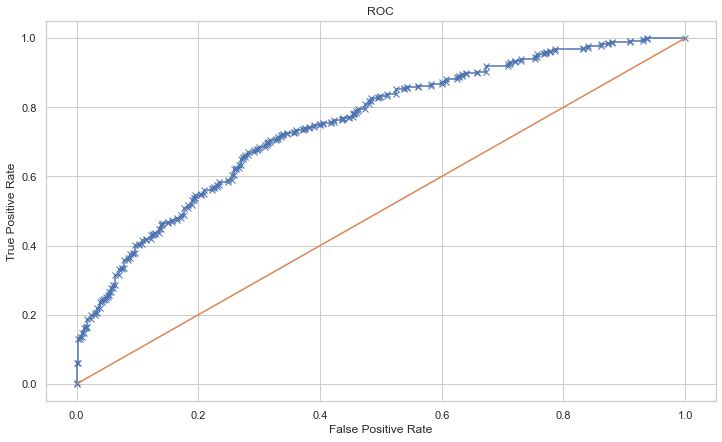

Area under Curve is 0.7509567329061912


In [107]:
#Check for the roc auc score and auc score
log_train_fpr, log_train_tpr,_=roc_curve(ytrain,model2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_train_fpr, log_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_train_auc = roc_auc_score(ytrain,model2.predict_proba(xtrain)[:,1])
print('Area under Curve is', log_train_auc )

### AUC and ROC for the testing data

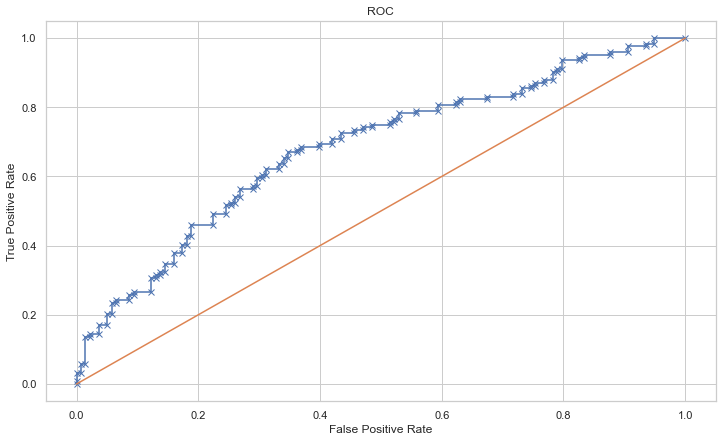

Area under Curve is 0.6823281907433381


In [108]:
#Check for the roc auc score and auc score
log_test_fpr, log_test_tpr,_=roc_curve(ytest,model2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_test_fpr, log_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_test_auc = roc_auc_score(ytest,model2.predict_proba(xtest)[:,1])
print('Area under Curve is', log_test_auc)

### Confusion Matrix for the training data

In [115]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytrain, ytrain_predict))

[[267  66]
 [126 151]]


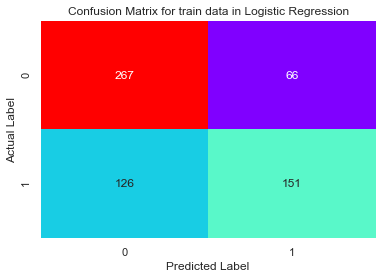

In [163]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, ytrain_predict)
sns.heatmap(confusion_matrix(ytrain, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in Logistic Regression')
plt.show()

### Data Accuracy

In [120]:
#Check for the accuracy score
log_train_acc = model2.score(xtrain,ytrain)
log_train_acc

0.6852459016393443

### Classification Report

In [119]:
#Check Classification report for train dataset
print(classification_report(ytrain, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       333
           1       0.70      0.55      0.61       277

    accuracy                           0.69       610
   macro avg       0.69      0.67      0.67       610
weighted avg       0.69      0.69      0.68       610



### Evaluation Metrices

In [114]:
log_metrics=classification_report(ytrain, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_f1=round(df.loc["1"][2],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_precision=round(df.loc["1"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.7
log_train_recall  0.55
log_train_f1  0.61


### Confusion Matrix for the test data

In [116]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytest, ytest_predict))

[[104  34]
 [ 62  62]]


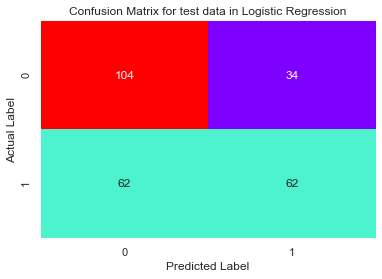

In [121]:
# Get the confusion matrix on the train data
confusion_matrix(ytest, ytest_predict)
sns.heatmap(confusion_matrix(ytest, ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in Logistic Regression')
plt.show()

### Data Accuracy

In [122]:
#Check for the accuracy score
log_test_acc = model2.score(xtest,ytest)
log_test_acc

0.6335877862595419

### Classification Report

In [123]:
#Check Classification report for train dataset
print(classification_report(ytest, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       138
           1       0.65      0.50      0.56       124

    accuracy                           0.63       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.64      0.63      0.63       262



### Evaluation Metrices

In [124]:
log_metrics=classification_report(ytest, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_f1=round(df.loc["1"][2],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_precision=round(df.loc["1"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.65
log_test_recall  0.5
log_test_f1  0.56


## LDA

In [164]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(xtrain, ytrain)

pred3 = ldamodel.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       333
           1       0.69      0.51      0.58       277

    accuracy                           0.67       610
   macro avg       0.68      0.66      0.66       610
weighted avg       0.68      0.67      0.66       610



array([[270,  63],
       [137, 140]], dtype=int64)

In [141]:
#Evaluation metrics for train lda data
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.69
lda_train_recall  0.51
lda_train_f1  0.58


In [165]:
# Prediction on the xtest data
pred4 = ldamodel.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.62      0.77      0.68       138
           1       0.64      0.47      0.54       124

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.61       262
weighted avg       0.63      0.63      0.62       262



array([[106,  32],
       [ 66,  58]], dtype=int64)

In [142]:
#Evaluation metrics for test lda data
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.47
lda_test_f1  0.54


In [143]:
#Check for the accuracy score
lda_train_acc = ldamodel.score(xtrain,ytrain)
lda_train_acc

0.6721311475409836

In [144]:
#Check for the accuracy score
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.6259541984732825

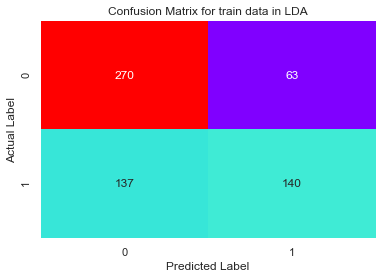

In [166]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in LDA')
plt.show()

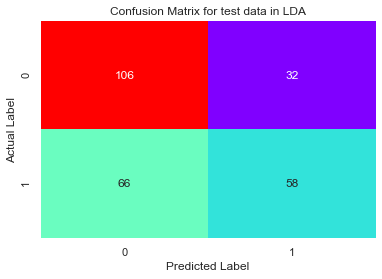

In [167]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in LDA')
plt.show()

In [127]:
#model intercept
ldamodel.intercept_

array([1.53671847])

In [128]:
coef = np.ndarray.flatten(ldamodel.coef_)
coef

array([-1.61578313e-05, -4.05251601e-02,  5.88811995e-02, -1.22973373e+00,
       -7.77736204e-03,  1.86756385e+00])

In [129]:
ds = ldamodel.intercept_ + xtrain.iloc[:,0] * coef[0] + xtrain.iloc[:,1] * coef[1] +  xtrain.iloc[:,2] * coef[2] + xtrain.iloc[:,3] * coef[3] + xtrain.iloc[:,4] * coef[4] + xtrain.iloc[:,5] * coef[5] 

In [130]:
ds

690   -0.137171
752    0.916908
864    0.394962
510   -0.411092
278   -2.121098
         ...   
426   -0.196383
60    -0.891297
715    0.862013
462   -1.036523
446   -0.872193
Length: 610, dtype: float64

In [131]:
sns.kdeplot(ds[ytrain==0])
sns.kdeplot(ds[ytrain==1])

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

## Model Evaluation for LDA

### Training Data

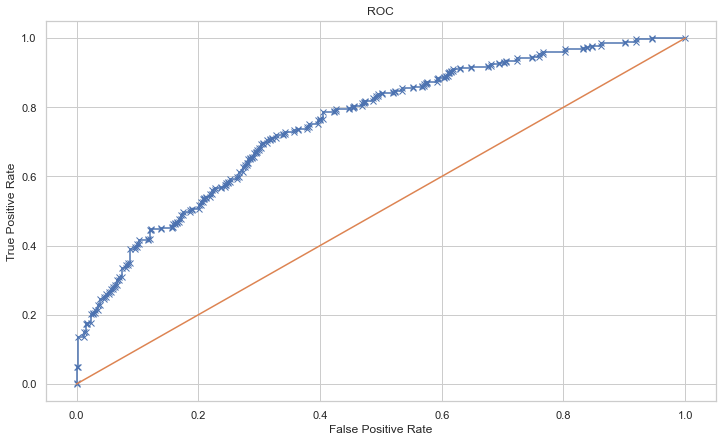

Area under Curve is 0.752691319478323


In [134]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytrain,ldamodel.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(ytrain,ldamodel.predict_proba(xtrain)[:,1])
print('Area under Curve is', lda_train_auc )

### Evaluation metrices for train data

In [135]:
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.69
lda_train_recall  0.51
lda_train_f1  0.58


In [136]:
#Check for the accuracy score of test data
lda_train_acc = ldamodel.score(xtrain,ytrain)
lda_train_acc

0.6721311475409836

### Test Data

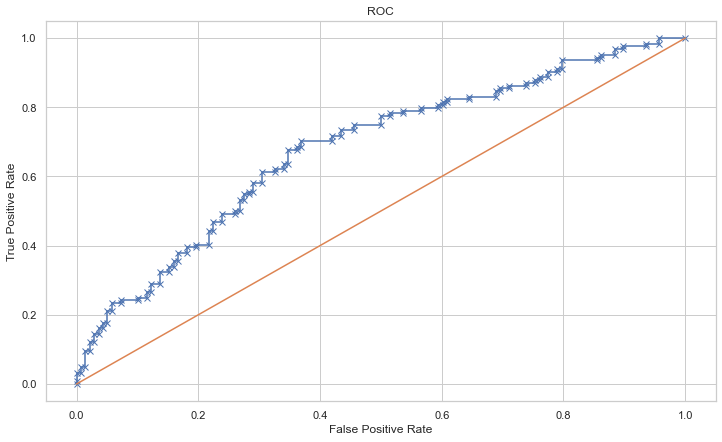

Area under Curve is 0.6809256661991585


In [137]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytest,ldamodel.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(ytest,ldamodel.predict_proba(xtest)[:,1])
print('Area under Curve is', lda_test_auc )

### Evaluation metrices for test data

In [138]:
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.47
lda_test_f1  0.54


In [139]:
#Check for the accuracy score of test data
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.6259541984732825

In [140]:
sns.kdeplot(prob[ytrain ==0])
sns.kdeplot(prob[ytrain ==1])

NameError: name 'prob' is not defined

In [132]:
pd.DataFrame(coef, columns=['coef'], index=xtrain.columns)

,coef
Salary,-0.000016
age,-0.040525
educ,0.058881
no_young_children,-1.229734
no_older_children,-0.007777
foreign,1.867564


## Quadratic Discriminant Analysis

In [145]:
qdamodel = QuadraticDiscriminantAnalysis()
qdamodel.fit(xtrain, ytrain)

pred = qdamodel.predict(xtrain)
print(classification_report(ytrain, pred))
confusion_matrix(ytrain, pred)

              precision    recall  f1-score   support

           0       0.73      0.67      0.69       333
           1       0.63      0.70      0.66       277

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



array([[222, 111],
       [ 84, 193]], dtype=int64)

## Predicting on Training and Test dataset

In [146]:
ytrain_predict = qdamodel.predict(xtrain)
ytest_predict = qdamodel.predict(xtest)

## Getting Predicted class and probs

In [147]:
ytest_predict
ytest_predict_prob=qdamodel.predict_proba(xtest)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.798403,0.201597
1,0.698203,0.301797
2,0.136198,0.863802
3,0.196935,0.803065
4,0.460351,0.539649


## Model Evaluation

### AUC and ROC for the training data

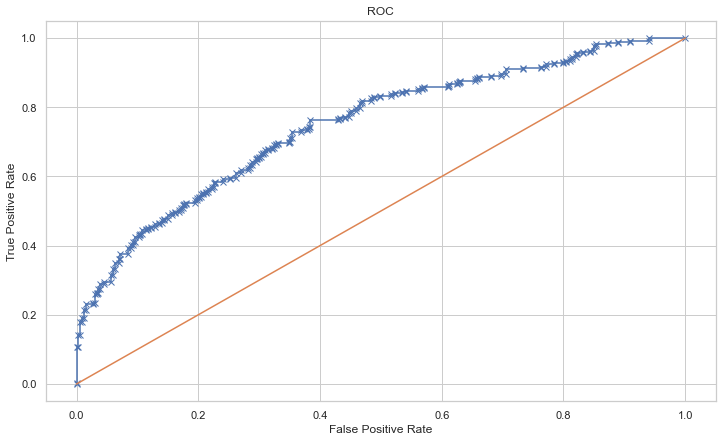

Area under Curve is 0.7483656942140695


In [148]:
#Check for the roc auc score and auc score
qda_train_fpr, qda_train_tpr,_=roc_curve(ytrain,qdamodel.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(qda_train_fpr, qda_train_tpr, marker='x', label='QDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
qda_train_auc = roc_auc_score(ytrain,qdamodel.predict_proba(xtrain)[:,1])
print('Area under Curve is', qda_train_auc )

### AUC and ROC for the testing data

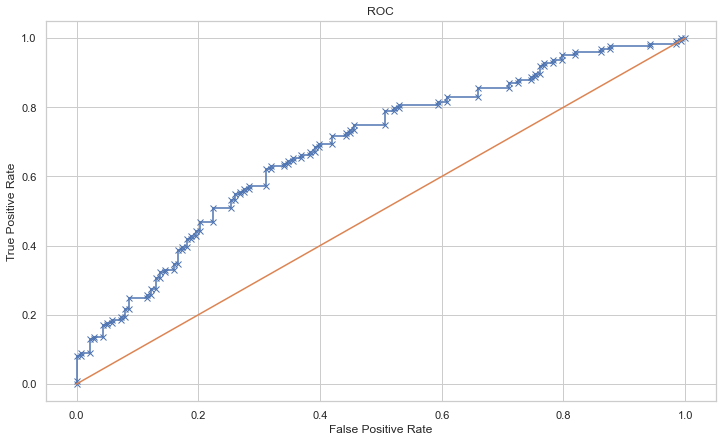

Area under Curve is 0.6867695184665731


In [149]:
#Check for the roc auc score and auc score
qda_test_fpr, qda_test_tpr,_=roc_curve(ytest,qdamodel.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(qda_test_fpr, qda_test_tpr, marker='x', label='QDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
qda_test_auc = roc_auc_score(ytest,qdamodel.predict_proba(xtest)[:,1])
print('Area under Curve is', qda_test_auc)

### Confusion Matrix for the training data

In [150]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytrain, ytrain_predict))

[[222 111]
 [ 84 193]]


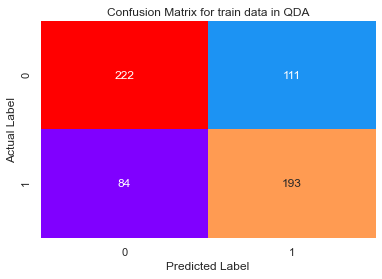

In [151]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, ytrain_predict)
sns.heatmap(confusion_matrix(ytrain, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in QDA')
plt.show()

### Data Accuracy

In [152]:
#Check for the accuracy score
qda_train_acc = qdamodel.score(xtrain,ytrain)
qda_train_acc

0.680327868852459

### Classification Report

In [153]:
#Check Classification report for train dataset
print(classification_report(ytrain, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.67      0.69       333
           1       0.63      0.70      0.66       277

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



### Evaluation Metrices

In [154]:
qda_metrics=classification_report(ytrain, ytrain_predict,output_dict=True)
df=pd.DataFrame(qda_metrics).transpose()
qda_train_f1=round(df.loc["1"][2],2)
qda_train_recall=round(df.loc["1"][1],2)
qda_train_precision=round(df.loc["1"][0],2)
print ('qda_train_precision ',qda_train_precision)
print ('qda_train_recall ',qda_train_recall)
print ('qda_train_f1 ',qda_train_f1)

qda_train_precision  0.63
qda_train_recall  0.7
qda_train_f1  0.66


### Confusion Matrix for the test data

In [155]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytest, ytest_predict))

[[88 50]
 [43 81]]


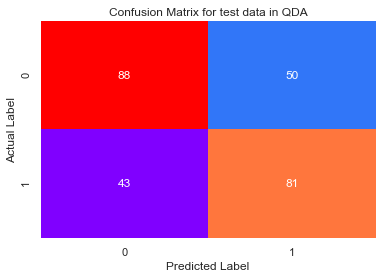

In [156]:
# Get the confusion matrix on the train data
confusion_matrix(ytest, ytest_predict)
sns.heatmap(confusion_matrix(ytest, ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in QDA')
plt.show()

### Data Accuracy

In [157]:
#Check for the accuracy score
qda_test_acc = qdamodel.score(xtest,ytest)
qda_test_acc

0.6450381679389313

### Classification Report

In [158]:
#Check Classification report for train dataset
print(classification_report(ytest, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       138
           1       0.62      0.65      0.64       124

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.65      0.65      0.65       262



### Evaluation Metrices

In [159]:
qda_metrics=classification_report(ytest, ytest_predict,output_dict=True)
df=pd.DataFrame(qda_metrics).transpose()
qda_test_f1=round(df.loc["1"][2],2)
qda_test_recall=round(df.loc["1"][1],2)
qda_test_precision=round(df.loc["1"][0],2)
print ('qda_test_precision ',qda_test_precision)
print ('qda_test_recall ',qda_test_recall)
print ('qda_test_f1 ',qda_test_f1)

qda_test_precision  0.62
qda_test_recall  0.65
qda_test_f1  0.64


**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

## Model Evaluation for LDA

### Training Data

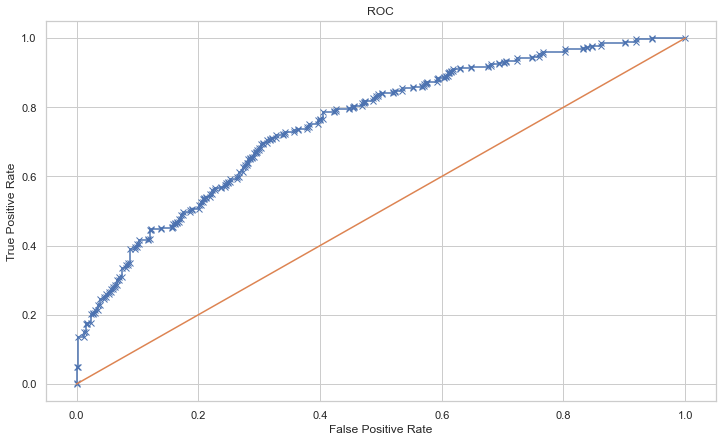

Area under Curve is 0.752691319478323


In [134]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytrain,ldamodel.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(ytrain,ldamodel.predict_proba(xtrain)[:,1])
print('Area under Curve is', lda_train_auc )

### Evaluation metrices for train data

In [135]:
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.69
lda_train_recall  0.51
lda_train_f1  0.58


In [136]:
#Check for the accuracy score of test data
lda_train_acc = ldamodel.score(xtrain,ytrain)
lda_train_acc

0.6721311475409836

### Test Data

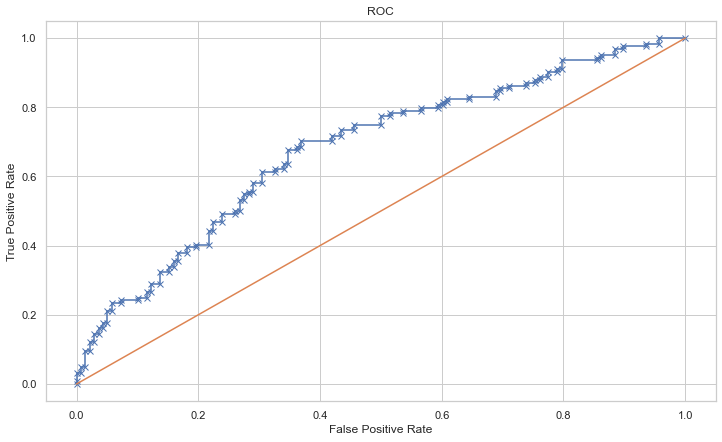

Area under Curve is 0.6809256661991585


In [137]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytest,ldamodel.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(ytest,ldamodel.predict_proba(xtest)[:,1])
print('Area under Curve is', lda_test_auc )

### Evaluation metrices for test data

In [138]:
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.47
lda_test_f1  0.54


In [139]:
#Check for the accuracy score of test data
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.6259541984732825

In [140]:
sns.kdeplot(prob[ytrain ==0])
sns.kdeplot(prob[ytrain ==1])

NameError: name 'prob' is not defined

2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.